Agora não é mais uma classificação de algo em um grupo, agora iremos prever um valor de vendas de um produto considerando o quanto foi gasto em publicidade em diferentes meios

# Previsão quantitativa

In [27]:
import pandas as pd
publi = pd.read_csv('https://www.statlearning.com/s/Advertising.csv',index_col=0)
publi.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [28]:
print(type(publi))

<class 'pandas.core.frame.DataFrame'>


In [29]:
print(publi.shape)

(200, 4)


In [30]:
x = publi[['TV','radio','newspaper']]
y = publi['sales']

In [31]:
x.shape

(200, 3)

In [32]:
y.shape

(200,)

## Regressão Linear

Previsão quantitativa


Linha de regressão (least square method) = distancia da linha ao valor real da observação

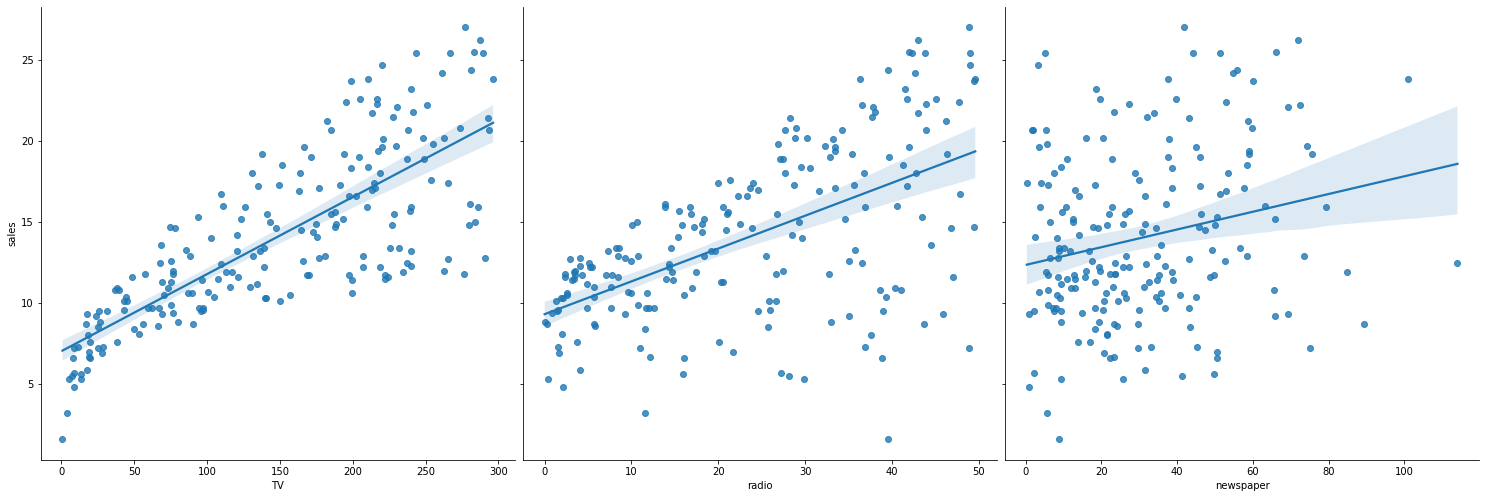

In [33]:
import seaborn as sns
sns.pairplot(publi, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, kind='reg')

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### Importação do modelo de regressão linear

In [35]:
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(x_train, y_train)

LinearRegression()

In [36]:
print(reglin.coef_)

[ 4.66955324e-02  1.80453704e-01 -5.92612568e-05]


### Coeficientes: Aumento nas vendas para cada  unidade investida em publicidade

In [37]:
list(zip(['TV','radio', 'newspaper'], reglin.coef_))

[('TV', 0.046695532381368546),
 ('radio', 0.1804537042685929),
 ('newspaper', -5.926125684104731e-05)]

### Previsão

In [38]:
print(reglin.predict([[203.1,37.8,69.2]]))

[19.13981821]


C:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
y_prev = reglin.predict(x_test)
print(y_prev)

[13.99699256 21.9679741  15.17693799  7.62964106 14.28899495 20.56590886
 20.54879112  8.74980665 10.06704696 10.28027981 13.2980346  18.53211862
 11.24843901 10.01636423  8.81187174 15.74559427  6.63073751 12.72602985
 15.4153376  17.12887598  9.33330702 11.52359703 12.97546947 19.88657555
 17.06272354  3.61938154 14.01470651  9.64371278  9.99378846  8.74884646
  9.03857571 21.63059425 19.04622652 12.66256533 15.33077696 14.79824486
 10.00199095 11.88491574  8.07196508 10.96397228 23.22395224 14.93368592
 14.8300898  14.9010397  21.54717568 16.3169967  24.02379588 18.88625082
  9.02045243 19.69899315 18.85029615  7.73906429 24.59060837 17.3625508
 23.12168916 18.00048826 17.74430883  7.26585562  5.98952544 12.37518065]


In [40]:
print(y_test)

101    11.7
129    24.7
86     15.2
122     7.0
172    14.5
85     21.7
186    22.6
144    10.4
158    10.1
13      9.2
162    13.3
185    17.6
32     11.9
83     11.3
47     10.6
26     12.0
120     6.6
51     11.4
155    15.6
42     17.1
141    10.9
135    10.8
64     14.0
177    20.2
28     15.9
9       4.8
182    12.2
80     11.0
91     11.2
67      9.5
126    10.6
59     23.8
93     19.4
58     13.2
88     16.0
27     15.0
152    11.6
149    10.9
50      9.7
165    11.9
102    23.8
115    14.6
124    15.2
163    14.9
43     20.7
41     16.6
184    26.2
69     18.9
30     10.5
54     21.2
34     17.4
66      9.3
176    27.0
4      18.5
18     24.4
60     18.4
103    14.8
171     8.4
107     7.2
180    12.6
Name: sales, dtype: float64


## Avaliação da perfomance
### MAE (Mear Absolute Error)

In [41]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_prev))

1.0814287361633155


### MSE (Mean Squared Error)

In [42]:
print(metrics.mean_squared_error(y_test, y_prev))

1.8184854291947015


### RMSE (Root Mean Squared Error)

In [46]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_prev)))

1.348512302203692
